In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

print('done')

done


In [65]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
df = pd.read_csv(url)
display(df.head())
print() # Leave a line
display(df.info())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

In [66]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


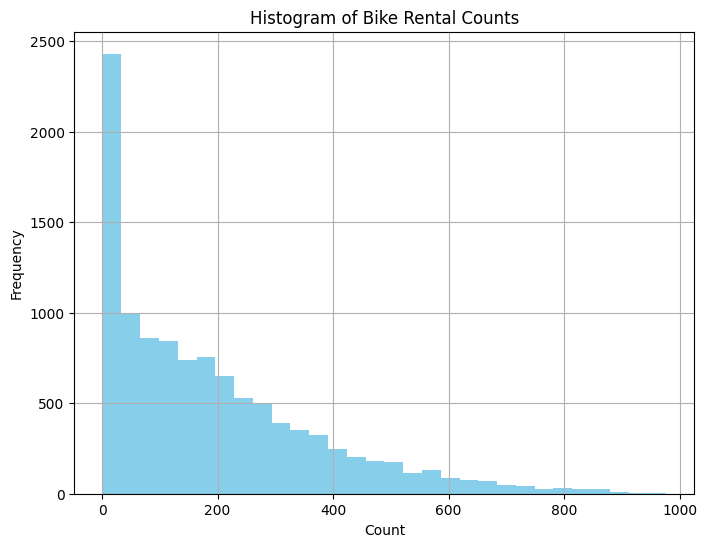

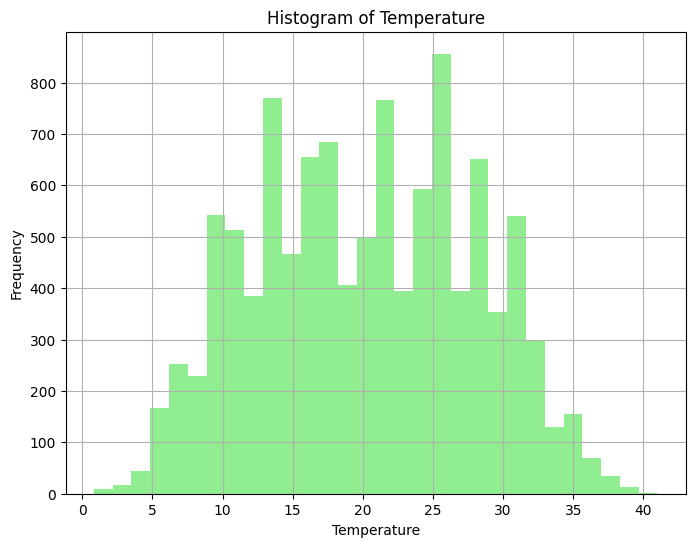

<ipython-input-67-5ae153ad6090>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=df, palette='viridis')


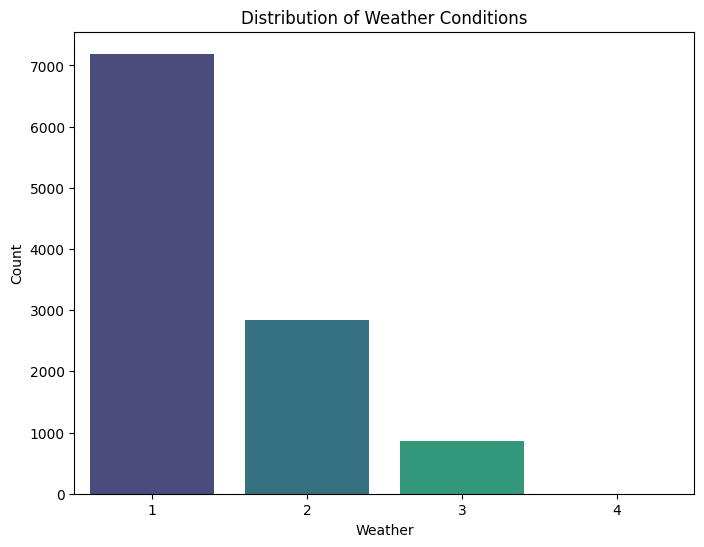

<ipython-input-67-5ae153ad6090>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=df, palette='muted')


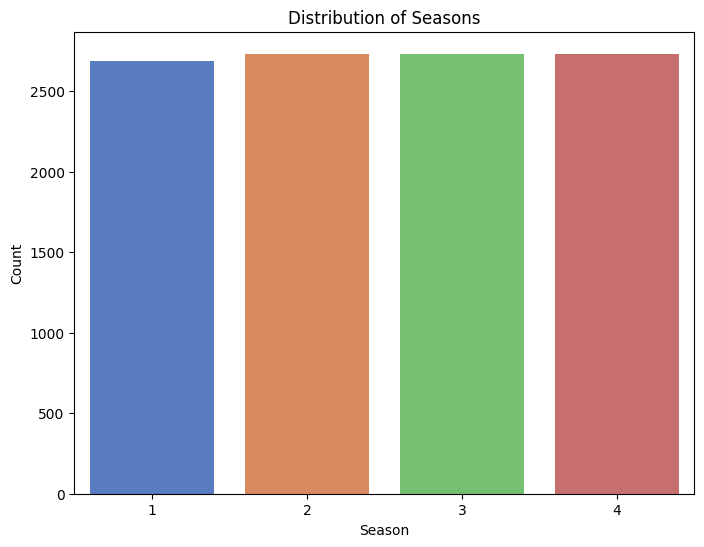

In [67]:
# Plot histogram for the 'count' variable
plt.figure(figsize=(8, 6))
plt.hist(df['count'], bins=30, color='skyblue')
plt.title('Histogram of Bike Rental Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram for the 'temp' variable (temperature)
plt.figure(figsize=(8, 6))
plt.hist(df['temp'], bins=30, color='lightgreen')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram for the 'weather' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='weather', data=df, palette='viridis')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

# Plot histogram for the 'season' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=df, palette='muted')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

Distribution of columns

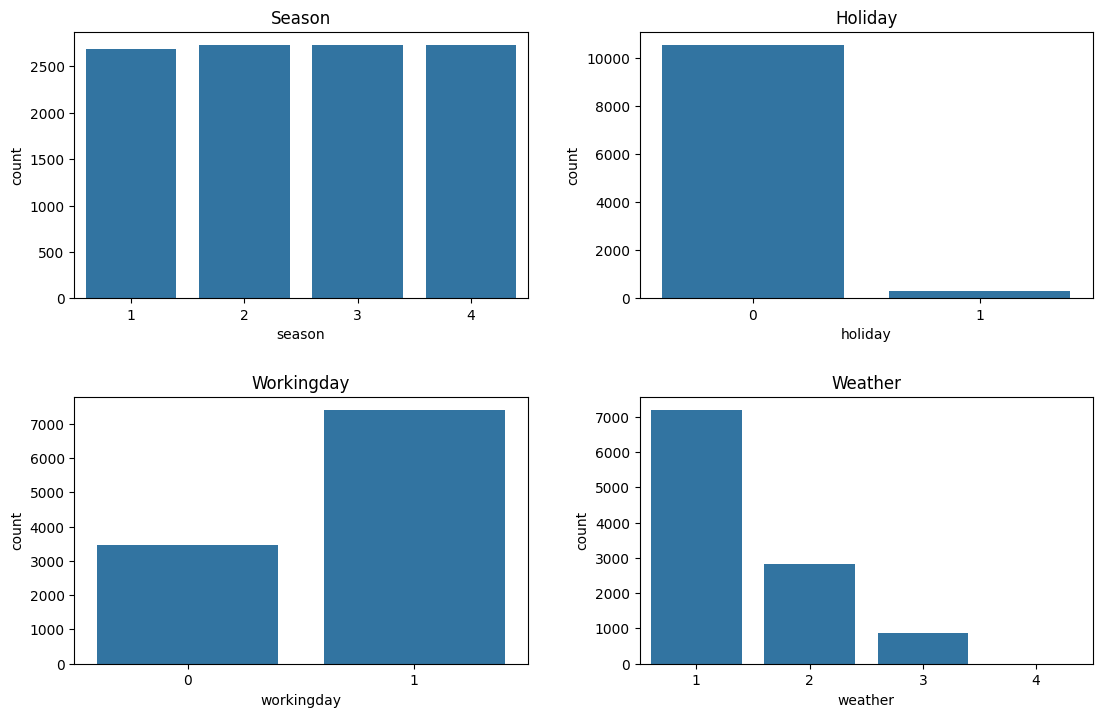

In [68]:
columns = ['season', 'holiday', 'workingday', 'weather']
fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.tight_layout(pad=5.0)
i = 0
j = 0
for column in columns:
    plot_df = sns.countplot(data=df,x=column,ax=ax[i,j])
    plot_df.set_title(str.capitalize(column))
    j = j + 1
    if j % 2 == 0 : i = i + 1; j = 0

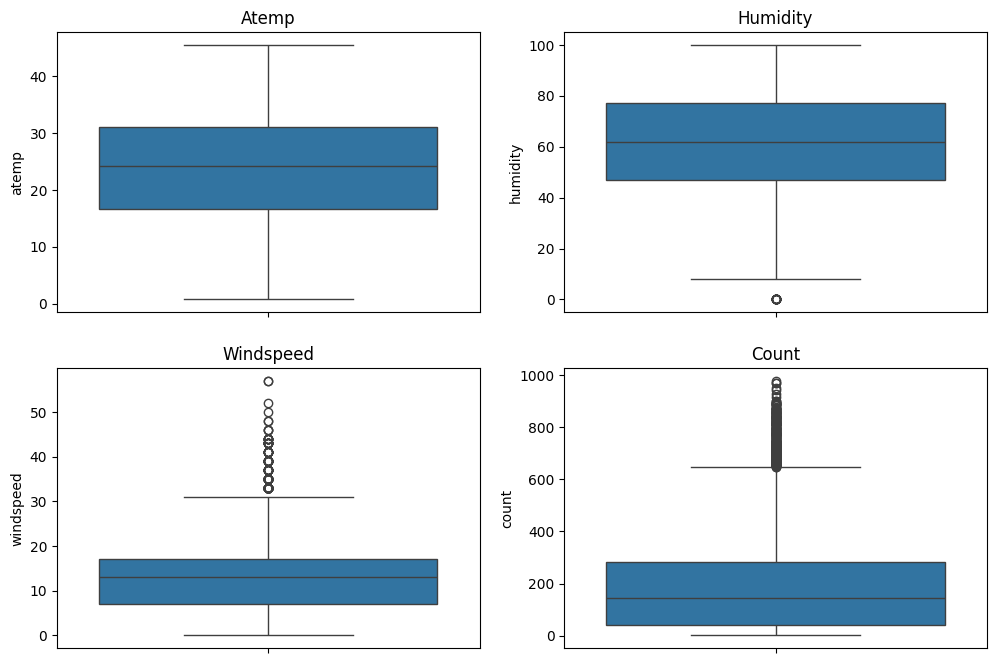

In [69]:
columns = ['atemp','humidity','windspeed','count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
i = 0
j= 0
for column in columns:
    plot_df = sns.boxplot(data=df,y=column,ax=ax[i,j])
    plot_df.set_title(str.capitalize(column))
    j = j + 1
    if j % 2 == 0 : i = i + 1; j = 0

- Season is uniformly distributed.
- Sales are higher on working days.
- Weather is clear most of the time.
- Generally, people don't step out/take Yulu when the weather is bad.
- Humidity and atemp have a normal distribution.

# Correlation Analysis

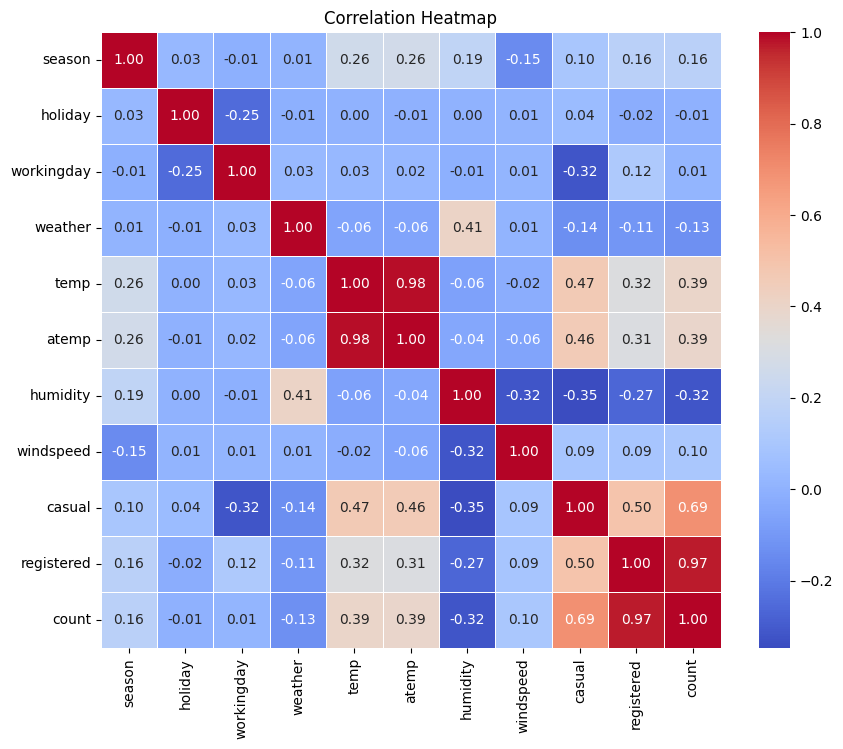

In [70]:
# Plotting the heatma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- A negative correlation between the "count" variable and "humidity" means that as humidity increases, the count of bike rentals tends to decrease, and vice versa.

- A positive correlation between the "count" variable and "atemp" (apparent temperature) indicates that as the apparent temperature increases, the count of bike rentals tends to increase as well, and vice versa.

Therefore, it can be said that people use Yulu when when the temperature is high and humidity is low.

# Hyptothesis Testing

### 1. Does a working day affect the no.of electric cycles rented?

Let, H0: Working day has no effect on the number of electric cycles rented

H1: Working day has effect on the number of electric cycles rented

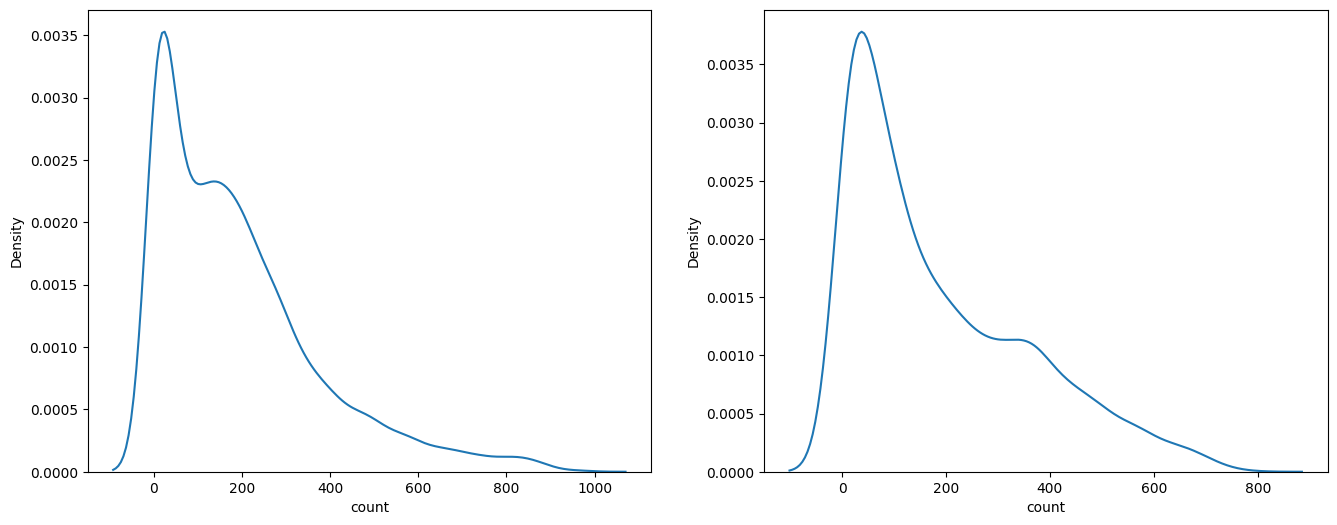

In [71]:
working_day = df.loc[df['workingday']==1,'count']
non_working_day = df.loc[df['workingday']==0,'count']

fig, ax = plt.subplots(1,2,figsize=(16,6))
working_day_plot = sns.kdeplot(working_day,ax=ax[0])
non_working_day_plot = sns.kdeplot(non_working_day,ax=ax[1])

In [72]:
statistic, p_value = mannwhitneyu(working_day, non_working_day)
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Test:
Statistic: 12868495.5
p-value: 0.9679139953914079


Since, the p-value obtained(0.9679) is much larger than 0.05, we fail to reject the null hypothesis.

Therefore, based on the Mann-Whitney U test, there is **no sufficient evidence to conclude that there is a significant difference in bike rental counts between working days and non-working days in your dataset**.


### 2. Is the no.of cycles rented similar or different in different seasons?

Let, H0: Seasons has no effect on the number of electric cycles rented

H1: Seasons has effect on the number of electric cycles rented

<Axes: xlabel='count', ylabel='Density'>

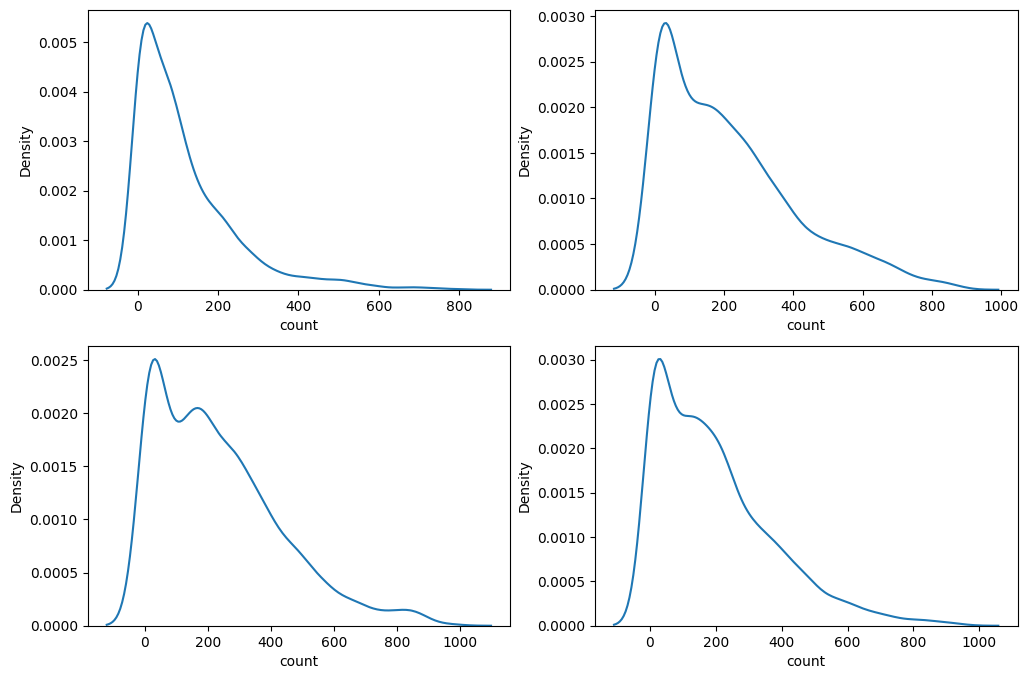

In [73]:
spring = df.loc[df['season']==1,'count']
summer = df.loc[df['season']==2,'count']
fall = df.loc[df['season']==3,'count']
winter = df.loc[df['season']==4,'count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(spring,ax=ax[0,0])
sns.kdeplot(summer,ax=ax[0,1])
sns.kdeplot(fall,ax=ax[1,0])
sns.kdeplot(winter,ax=ax[1,1])

In [74]:
statistic, p_value = kruskal(spring, summer, fall, winter)

print("Kruskal-Wallis H Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis H Test:
Statistic: 699.6668548181988
p-value: 2.479008372608633e-151



A p-value of approximately
2.48
×
1
0
−
151
2.48×10
−151
  is extremely small, indicating strong evidence against the null hypothesis.

Therefore, season affects the no.of riders

([<matplotlib.axis.XTick at 0x7fbde1724e20>,
 [Text(0, 0, 'spring'),
  Text(1, 0, 'summer'),
  Text(2, 0, 'fall'),
  Text(3, 0, 'winter')])

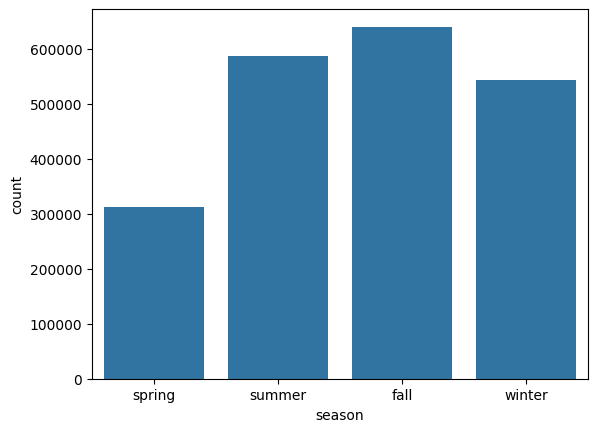

In [75]:
season_grouped = pd.DataFrame(df.groupby('season')['count'].sum())
sns.barplot(data=season_grouped,x=season_grouped.index,y='count')
plt.xticks(range(4),['spring','summer','fall','winter'])

The above graph shows that the max. amount of electric cycle usage is in the fall season

### 3. Does weather affect the no.of cycles rented?

Let, H0: Weather has no affect on the number of electric cycles rented

H1: Weather affects the number of electric cycles rented

<ipython-input-76-ae5670d9ddbe>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(heavy_rain,ax=ax[1,1])


<Axes: xlabel='count', ylabel='Density'>

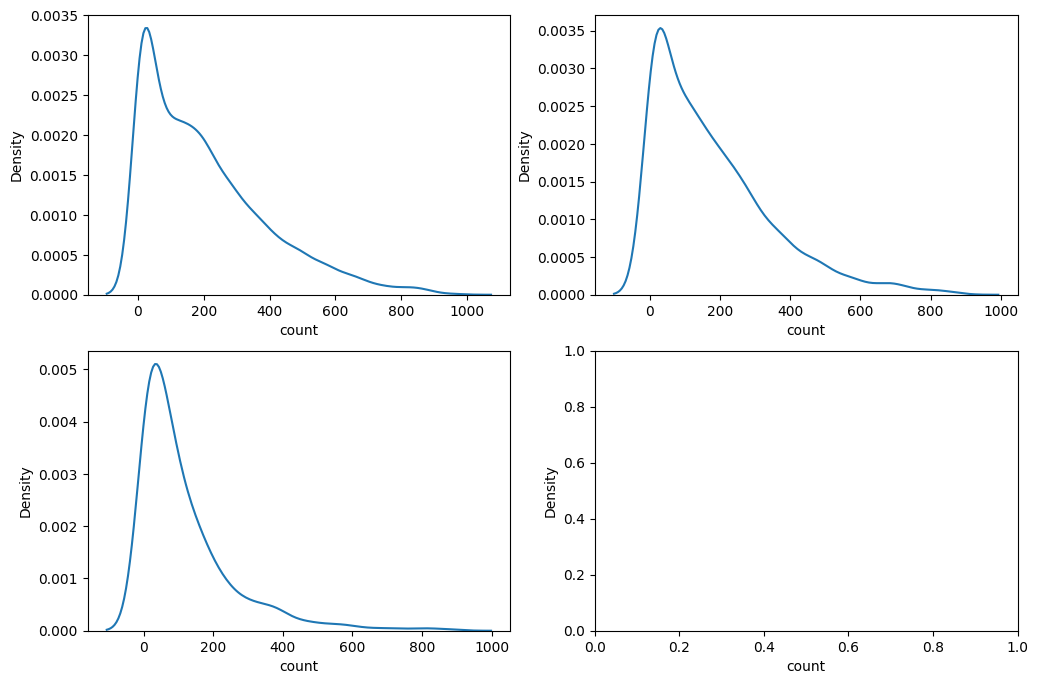

In [76]:
clear = df.loc[df['weather']==1,'count']
mist = df.loc[df['weather']==2,'count']
light_rain = df.loc[df['weather']==3,'count']
heavy_rain = df.loc[df['weather']==4,'count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(clear,ax=ax[0,0])
sns.kdeplot(mist,ax=ax[0,1])
sns.kdeplot(light_rain,ax=ax[1,0])
sns.kdeplot(heavy_rain,ax=ax[1,1])

In [77]:
statistic, p_value = kruskal(clear, mist, light_rain, heavy_rain)

print("Kruskal-Wallis H Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis H Test:
Statistic: 205.00216514479087
p-value: 3.501611300708679e-44


A p-value of approximately
3.50
×
1
0
−
44
3.50×10
−44
  is extremely small, indicating strong evidence against the null hypothesis.

This means that weather conditions indeed affect electric cycle usage significantly.


([<matplotlib.axis.XTick at 0x7fbde031e950>,
 [Text(0, 0, 'clear'),
  Text(1, 0, 'mist'),
  Text(2, 0, 'light rain'),
  Text(3, 0, 'heavy rain')])

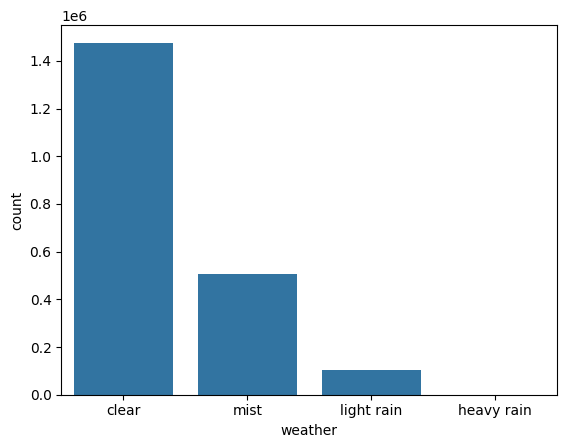

In [78]:
weather_grouped = pd.DataFrame(df.groupby('weather')['count'].sum())
sns.barplot(data=weather_grouped,x=weather_grouped.index,y='count')
plt.xticks(range(4),['clear','mist','light rain','heavy rain'])

The above graph the max. amount of electric cycle usage is when the weather is clear

### 4. Is the weather dependent on season

Let, H0: Weather and Season are two independent columns

H1: Weather and Season are two indifferent columns

In [79]:
# Making a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

# Perform Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Test:")
print("Chi2 statistic:", chi2)
print("p-value:", p_value)

Chi-Square Test:
Chi2 statistic: 49.158655596893624
p-value: 1.549925073686492e-07


With a p-value of approximately
1.55
×
1
0
−
7
1.55×10
−7
 , we can reject the null hypothesis that there is no association between the variables 'season' and 'weather' with respect to the 'count' variable.

 It implies that the season and weather conditions do not occur independently concerning bike rental counts.